In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Векторные пространства


Для начала вспомним, что вектора можно переводить из одного базиса в другой. Пусть у нас есть базисы $\{\vec{e}_i\}_{i=1}^d$ и $\{\vec{f}_i\}_{i=1}^d$.

$$
\vec{A} = \sum_{i=1}^d\alpha_i\vec{e}_i = \sum_{i=1}^d\beta_i\vec{f}_i\text{,} \\
\vec{e}_i = \sum_{j=1}^d c_{ij}\vec{f}_j\text{,} \\
\vec{A} = \sum_{i=1}^d\alpha_i\vec{e}_i =
\sum_{i=1}^d \alpha_i \sum_{j=1}^d c_{ij} \vec{f}_j =
\sum_{j=1}^d \vec{f}_j \sum_{i=1}^d \alpha_i c_{ij}\text{,} \\
\beta_j = \sum_{i=1}^d\alpha_i c_{ij}\text{,} \\
\begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \end{pmatrix} =
\begin{pmatrix}
c_{11} & c_{21} & \cdots & c_{d1} \\
c_{12} & c_{22} & \cdots & c_{d2} \\
\vdots & \vdots & \ddots & \vdots \\
c_{1d} & c_{2d} & \cdots & c_{dd}
\end{pmatrix}
\cdot
\begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_d \end{pmatrix}\text{.}
$$

Кроме того, систему координат (СК) можно параллельно переносить. Для получения координат точек в новой СК нужно вычесть из координат старой СК вектор переноса.

In [2]:
def convert(points, new_center=[[0], [0]], new_e=[[1, 0], [0, 1]]):
    """Получить координаты точек в системе координат с новым центром и новым базисом.
    
    points
        матрица, в которой столбцы - точки.
    
    new_center
        новый центр в виде вектора-столбца.
    
    new_e
        матрица, в которой строки - вектора нового базиса."""
    translated = points - new_center
    transformed = np.dot(np.linalg.inv(new_e.T), translated)
    return transformed

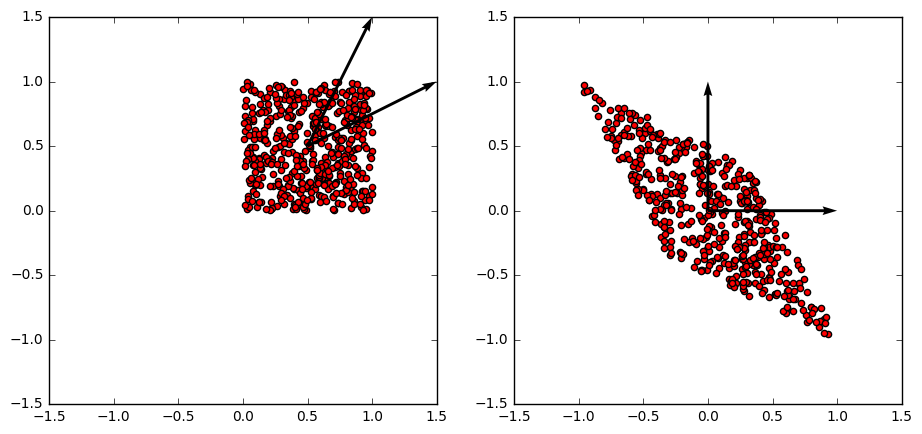

In [3]:
# Зафиксируем seed
np.random.seed(239)

# Количество точек
point_n = 500
# Сгенерируем координаты точек в старой СК
old_x = np.random.uniform(0, 1, point_n)
old_y = np.random.uniform(0, 1, point_n)
# Точки - столбцы матрицы
olds = np.array([old_x, old_y])
# Координаты центра и вектора базиса новой СК в старой
new_c = np.array([0.5, 0.5])
new_e = np.array([[1, 0.5], [0.5, 1]])
news = convert(olds, new_c[np.newaxis].T, new_e)

# Рисуем точки
f, axes = plt.subplots(1, 2, figsize=(11, 5))
max_coord = 1.5
for axis, points, c, (e1, e2) in zip(axes,
                                     [olds, news],
                                     [new_c, [0, 0]],
                                     [new_e, ([0, 1], [1, 0])]):
    axis.scatter(points[0,], points[1,], c='r')
    axis.axis([-max_coord, max_coord, -max_coord, max_coord])
    axis.quiver(c, c, e1, e2, angles='xy', scale_units='xy', scale=1)
plt.show()

## Аффинные пространства

Представим Алису и Боба на векторной плоскости. Алиса находится в точке $(0; 0)$, а Боб находится в точке $p$, и есть две точки $a$ и $b$, которые служат им в качестве ориентиров. Они могут считать вектора от своего положения до точек $a$ и $b$ базисами, и обмениваться координатами других точек. Однако, почти всегда эти координаты будут различаться. Но тогда, когда у кого-то из них сумма полученных координат будет равна $1$, эти координаты будут совпадать:
$$p + \lambda(a - p) + (1 - \lambda)(b - p) = \lambda a + (1 - \lambda) b\text{.}$$

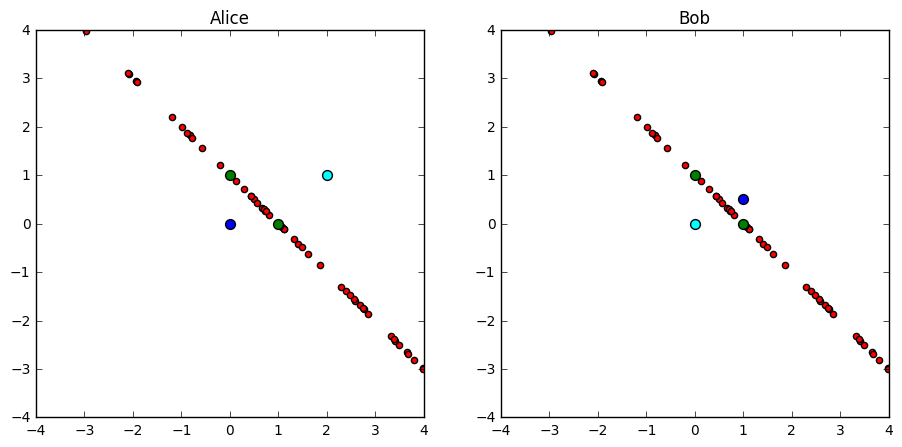

In [4]:
# На самом деле, при двух ориентирах такие комбинации будут давать точки на прямой, соединяющей ориентиры.

np.random.seed(239)

# Количество точек
point_n = 50

# Ориентиры
alice_landmarks = np.array([[1, 0], [0, 1]]).T
# Положения Алисы и Боба
alice_centers = np.array([[0, 0], [2, 1]]).T
# Точки в плоскости Алисы
alice_x = np.random.uniform(-3, 4, point_n)
alice_y = 1 - alice_x
alice_points = np.array([alice_x, alice_y])

# То же, только относительно Боба
alice_to_bob = lambda points: convert(points,
                                      alice_centers[:,1:],
                                      alice_landmarks - alice_centers.T[1])
bob_points = alice_to_bob(alice_points)
bob_centers = alice_to_bob(alice_centers)
bob_landmarks = alice_to_bob(alice_landmarks)

# Нарисуем плоскости Алисы и Боба
f, axes = plt.subplots(1, 2, figsize=(11, 5))
max_coord = 4
for title, axis, points, centers, landmarks in zip(["Alice", "Bob"],
                                                   axes,
                                                   [alice_points, bob_points],
                                                   [alice_centers, bob_centers],
                                                   [alice_landmarks, bob_landmarks]):
    axis.scatter(points[0,], points[1,], c='r')
    axis.scatter(centers[0,:1], centers[1,:1], c='b', s=50)
    axis.scatter(centers[0,1:], centers[1,1:], c='cyan', s=50)
    axis.scatter(landmarks[0,], landmarks[1,], c='g', s=50)
    axis.axis([-max_coord, max_coord, -max_coord, max_coord])
    axis.set_title(title)
plt.show()

Комбинация, в которой сумма коэфициентов равна $1$, называется **аффинной комбинацией**, или **барицентрической комбинацией**. Если Боб будет менять своё положение, но ориентироваться на одни и те же точки, то одинаковые аффинные комбинации векторов, соединяющих его положение с ориентирами, будут давать одинаковые результаты.

Аффинные комбинации позволяют нам избавиться от понятия начала координат, так как не важно, что принимать за точку отсчёта. В векторных пространствах линейные комбинации всегда обязаны содержать вектор $(0,0)$, и, например, прямая $y=1-x$ не является подпространством $\mathbb R^2$, что довольно странно с точки зрения геометрии.

**Аффинное пространство** - это множество точек $A$, множество векторов $V$ и действие $(+) : A \times V \rightarrow A$, обладающее следующими свойствами:
- $\forall a \in A : a + 0 = a$;
- $\forall v, w \in V, a \in A : (a + v) + w = a + (v + w)$;
- Для всех $a$ из $A$ отображение $f(v) = a + v$ биективно.

Последнее свойство позволяет определить разницу двух точек аффинного пространства.

В аффинных пространствах нет начала координат, и аффинные подпространства (множества аффинных комбинаций) уже не обязаны содержать точку $(0,0)$. Например, в них $y=1-x$ является подпространством аффинного пространства над $\mathbb R^2$.

Можно ввести понятия аффинно независимых точек. Пусть $\langle A, V, (+)\rangle$ — это аффинное пространство. Множество точек $\{a_i\}_{i \in I}$ **аффинно независимо**, если для любого $i \in I$ множество $\{\overrightarrow{a_i a_j}\}_{j \in I \setminus \{i\}}$ линейно независимо.

Можно показать, что если существует хотя бы одно такое $i$, то проводя вектора от любой из точек будут получаться линейно независимые вектора.

## Ориентация

Одна из основных операций, которой мы будем пользоваться - предикат поворота, позволяющий определять относительное положение точек в пространстве.

Пусть в нашем $d$ мерном пространстве есть $d$ аффинно независимых точек $a_1, a_2, \ldots, a_d$, однозначно задающих гиперплоскость. Рассмотрим положение новой точки $p$ относительно этой гиперплоскости. Для этого рассмотрим определитель матрицы перехода в базис $\{a_i-x\}_{i=1}^p$:

$$ \det M^\mathrm T =
\begin{vmatrix}
a_1 - p \\ a_2 - p \\ \vdots \\ a_n - p
\end{vmatrix}
= \begin{vmatrix}
a_1 - p & 0 \\ a_2 - p & 0 \\ \vdots & \vdots \\ a_n - p & 0 \\ p & 1
\end{vmatrix}
= \begin{vmatrix}
a_1 & 1 \\ a_2 & 1 \\ \vdots & \vdots \\ a_n & 1 \\ p & 1
\end{vmatrix}\text{.}
$$

Заметим, что точка $p$ принадлежит гиперплоскости тогда и только тогда, когда $\det M^\mathrm T = 0$. Действительно, если $p$ лежит в гиперплоскости, то набор векторов $\{a_i-x\}_{i=1}^p$ будет линейно зависим, и определитель будет равняться нулю, и наоборот.

Теперь разделим всё пространство кроме точек плоскости на два множества в зависимости от знака определителя. Покажем, что получившиеся множества будут выпуклыми. По определению выпуклого множества надо проверить, что если точки $p_1$ и $p_2$ лежат в одной плоскости, то и все точки между ними $p_1 + \alpha \cdot \overrightarrow{p_1p_2}$, где $\lambda \in [0..1]$, тоже будут лежать в одной плоскости. Если подставить это в определитель, и вспомнить, что $1 = \alpha + (1 - \alpha)$, то получим

$$\begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\ p_1 + \alpha \cdot \overrightarrow{p_1p_2} & 1 \end{vmatrix} =  \begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\  \alpha p_2 + (1 - \alpha)p_1 & 1 \end{vmatrix} =  \alpha \begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\  p_2 & 1 \end{vmatrix} + (1 - \alpha) \begin{vmatrix} a_1 & 1 \\ a_2 & 1\\ \vdots & \vdots \\ a_d & 1 \\  p_1 & 1 \end{vmatrix}\text{.}$$

Оба определителя по предположению имеют одинаковый знак, и коэффициенты при них положительны. Значит, результат будет того же знака.

Получается, что с помощью такого определителя можно задавать полупространства и проверять положение точек относительно друг друга.

## Пример: проверка многоугольника на выпуклость

Для проверки многоугольника на выпуклость достаточно проверить, что повороты троек последовательных в порядке обхода вершин совпадают.

In [5]:
def orientation(points, p):
#     matrix = np.concatenate((points, [p]), axis=0)
#     matrix = np.concatenate((matrix, np.ones(len(points) + 1)[np.newaxis].T), axis=1)
#     return np.sign(np.linalg.det(matrix))
    # Проще вычесть
    return np.sign(np.linalg.det(points - p))

In [ ]:
# Вспомогательная функция для отрисовки, список points должен содержать 9 точек
def draw_polygon(points):
    f, axes = plt.subplots(3, 3, figsize=(10, 10))
    
    points_t = points.T
    points_cycled = np.concatenate((points_t, points[0][np.newaxis].T), axis=1)
    
    for axis, i in zip(axes.reshape((9)),
                       range(9)):
        center = points[i - 1]
        e1 = points[i] - center
        e2 = points[i - 2] - center
        
        relative_points = convert(points_cycled, center[np.newaxis].T, np.array([e1, e2]))
        turn = orientation([points[i], points[i - 2]], center)
        
        axis.scatter(relative_points[0,], relative_points[1,])
        axis.plot(relative_points[0,], relative_points[1,], c='g')
        axis.quiver([0, 0], [0, 0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, width=0.02)
        axis.set_title("i = {}, sign = {}".format(i - 1, turn))
    
    plt.show()

Пример для невыпуклого многоугольника.

In [ ]:
draw_polygon(np.array([
        [0, 0],
        [1, 0],
        [2.5, 1],
        [3, 2],
        [2, 3],
        [2, 4],
        [0, 4],
        [1, 3],
        [0, 1]]))

Пример для выпуклого многоугольника.

In [ ]:
draw_polygon(np.array([
        [0, 0],
        [1, 0],
        [3, 0.5],
        [4, 2],
        [4, 4],
        [2, 4],
        [1, 3.5],
        [0.1, 2.5],
        [0, 1]]))